In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

from sklearn import linear_model
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 15, 7.5


# The training dataset 
df=pd.read_csv('/Users/johnreid/DSGPractice/Titanic/data/train.csv', sep=',',header=0)
pclass_train = np.transpose([df["Pclass"]])
survived_train = np.transpose([df["Survived"]])

# The test dataset
df_test=pd.read_csv('/Users/johnreid/DSGPractice/Titanic/data/test.csv', sep=',',header=0)
pclass_test = np.transpose([df_test["Pclass"]])

# There are some missing age values. Let's fill them in with the median age
df["Age"].fillna(df["Age"].median(), inplace = True)

Let's start by visualizing some of the data

In [46]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


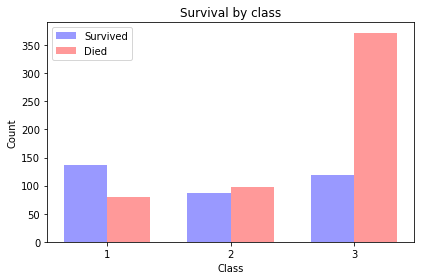

In [76]:
n_groups = 3
index = np.arange(n_groups)

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.4

survived_class = df.loc[df["Survived"] == 1, "Pclass"].value_counts().sort_index(0)
died_class = df.loc[df["Survived"] == 0, "Pclass"].value_counts().sort_index(0)

rects1 = plt.bar(index, survived_class, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Survived')

rects2 = plt.bar(index + bar_width, died_class, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Died')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival by class')
plt.xticks(index + bar_width / 2, ('1', '2', '3'))
plt.legend()
plt.tight_layout()
plt.show()

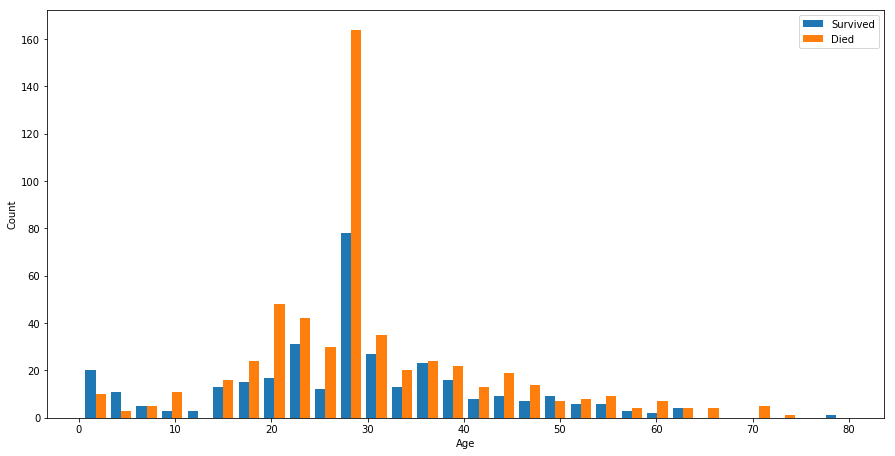

In [90]:
n_groups = (set(df["Age"]))
n_groups

plt.hist((df.loc[df["Survived"] == 1, "Age"], df.loc[df["Survived"] == 0, "Age"]), \
         bins = 30, label = ["Survived", "Died"])
plt.xlabel("Age")
plt.ylabel("Count")

plt.legend()
plt.show()

891


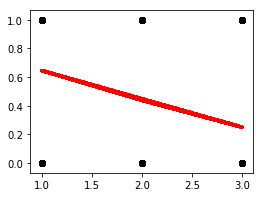

Accuracy using logistic regression with ticket class to predict survival is 67.9%


In [116]:
age_train = np.transpose([df["Age"]])

print(len(age_train))

clf = linear_model.LogisticRegression(C=1e5)
clf.fit(pclass_train, survived_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(pclass_train.ravel(), survived_train, color='black', zorder=20)
# X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(pclass_train * clf.coef_ + clf.intercept_).ravel()
plt.plot(pclass_train, loss, color='red', linewidth=3)

plt.show()

num_passengers = len(df["Survived"])
loss = [1 if value > 0.5 else 0 for value in loss]
result = sum([1 if x == y else 0 for x, y in zip(loss, survived_train)])
print("Accuracy using logistic regression with ticket class to predict survival is %.1f%%" \
      % (float(result)/num_passengers * 100.0))

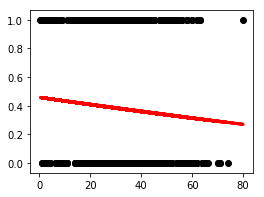

Accuracy using logistic regression with age to predict survival is 61.6%


In [115]:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(age_train, survived_train)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(age_train.ravel(), survived_train, color='black', zorder=20)
# X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(age_train * clf.coef_ + clf.intercept_).ravel()
plt.plot(age_train, loss, color='red', linewidth=3)

plt.show()

num_passengers = len(df["Survived"])
loss = [1 if value > 0.5 else 0 for value in loss]
result = sum([1 if x == y else 0 for x, y in zip(loss, survived_train)])
print("Accuracy using logistic regression with age to predict survival is %.1f%%" \
      % (float(result)/num_passengers * 100.0))

In [125]:
from sklearn import datasets, cross_validation, metrics
from sklearn.linear_model import LogisticRegression

# Get all the numeric data entries
mat = df.as_matrix(["Age", "Fare", "Pclass", "SibSp", "Parch"])
predicted = cross_validation.cross_val_predict(LogisticRegression(), mat, df['Survived'], cv=10)
res = metrics.accuracy_score(df["Survived"], predicted)
print("Accuracy using 5 input variables is %.1f%%" % (res * 100))

Accuracy using 5 input variables is 70.1%
